# Chapter 10 - Deep Learning - CNNs

## 10.9.3 Convolutional Neural Networks

In this section we fit a CNN to the CIFAR100 data, which is available in the keras package. It is arranged in a similar fashion as the MNIST data.

In [1]:
library(keras)

In [2]:
cifar100 <- dataset_cifar100()

In [3]:
names(cifar100)

[1] "train" "test"

In [4]:
x_train <- cifar100$train$x
g_train <- cifar100$train$y
x_test <- cifar100$test$x
g_test <- cifar100$test$y

In [5]:
dim(x_train)

[1] 50000    32    32     3

The array of 50,000 training images has four dimensions: each three-color image is represented as a set of three channels, each of which consists of 32 × 32 eight-bit pixels. We standardize as we did for the digits, but keep the array structure. We one-hot encode the response factors to produce a 100-column binary matrix.

In [6]:
x_train <- x_train / 255
x_test <- x_test / 255
y_train <- to_categorical(g_train, 100)
dim(y_train)

[1] 50000   100

In [8]:
library(jpeg)

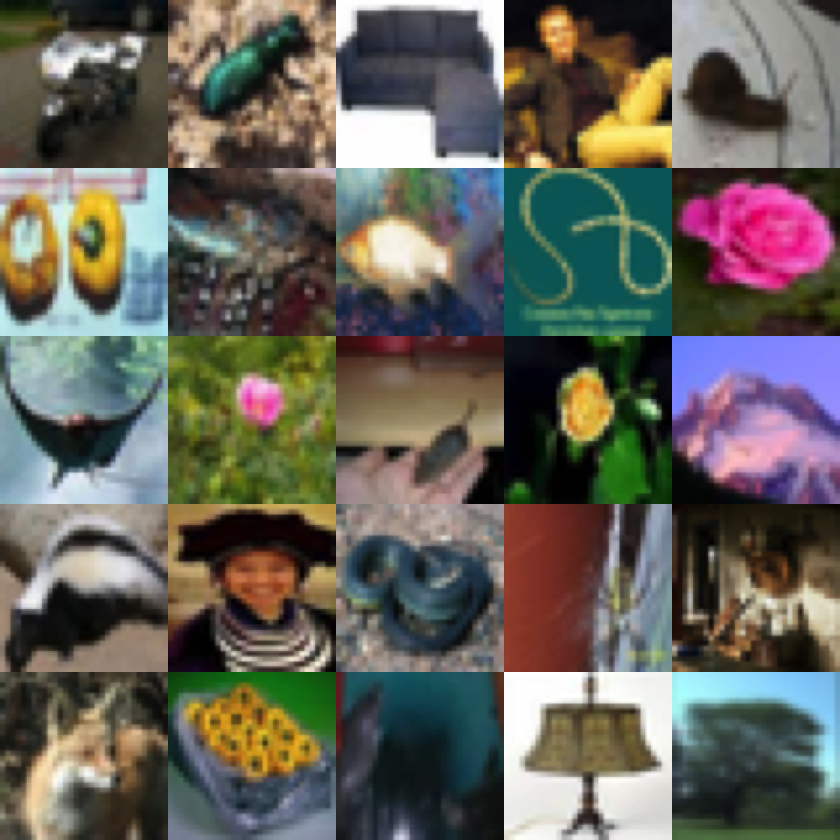

In [9]:
par(mar = c(0, 0, 0, 0), mfrow = c(5, 5))
index <- sample(seq(50000), 25)
#The as.raster() function converts the feature map 
#so that it can be plotted as.raster() as a color image.
for (i in index) plot(as.raster(x_train[i,,, ]))

In [12]:
 model <- keras_model_sequential() %>%
        layer_conv_2d(filters = 32, kernel_size = c(3, 3),
            padding = "same", activation = "relu",
            input_shape = c(32, 32, 3)) %>%
        layer_max_pooling_2d(pool_size = c(2, 2)) %>%
        layer_conv_2d(filters = 64, kernel_size = c(3, 3),
            padding = "same", activation = "relu") %>%
        layer_max_pooling_2d(pool_size = c(2, 2)) %>%
        layer_conv_2d(filters = 128, kernel_size = c(3, 3),
            padding = "same", activation = "relu") %>%
        layer_max_pooling_2d(pool_size = c(2, 2)) %>%
        layer_conv_2d(filters = 256, kernel_size = c(3, 3),
            padding = "same", activation = "relu") %>%
        layer_max_pooling_2d(pool_size = c(2, 2)) %>%
        layer_flatten() %>%
        layer_dropout(rate = 0.5) %>%
        layer_dense(units = 512, activation = "relu") %>%
        layer_dense(units = 100, activation = "softmax")

In [13]:
model

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_3 (Conv2D)                  (None, 32, 32, 32)              896         
 max_pooling2d_3 (MaxPooling2D)     (None, 16, 16, 32)              0           
 conv2d_2 (Conv2D)                  (None, 16, 16, 64)              18496       
 max_pooling2d_2 (MaxPooling2D)     (None, 8, 8, 64)                0           
 conv2d_1 (Conv2D)                  (None, 8, 8, 128)               73856       
 max_pooling2d_1 (MaxPooling2D)     (None, 4, 4, 128)               0           
 conv2d (Conv2D)                    (None, 4, 4, 256)               295168      
 max_pooling2d (MaxPooling2D)       (None, 2, 2, 256)               0           
 flatten (Flatten)                  (None, 1024)                    0           
 dropout (Dropout)                  (None, 1024)                    0           
 dense_1

In [14]:
model %>% compile(loss = "categorical_crossentropy", 
                  optimizer = optimizer_rmsprop(), metrics = c("accuracy"))

In [15]:
history <- model %>% fit(x_train, y_train, epochs = 30, batch_size = 128, 
                         validation_split = 0.2)


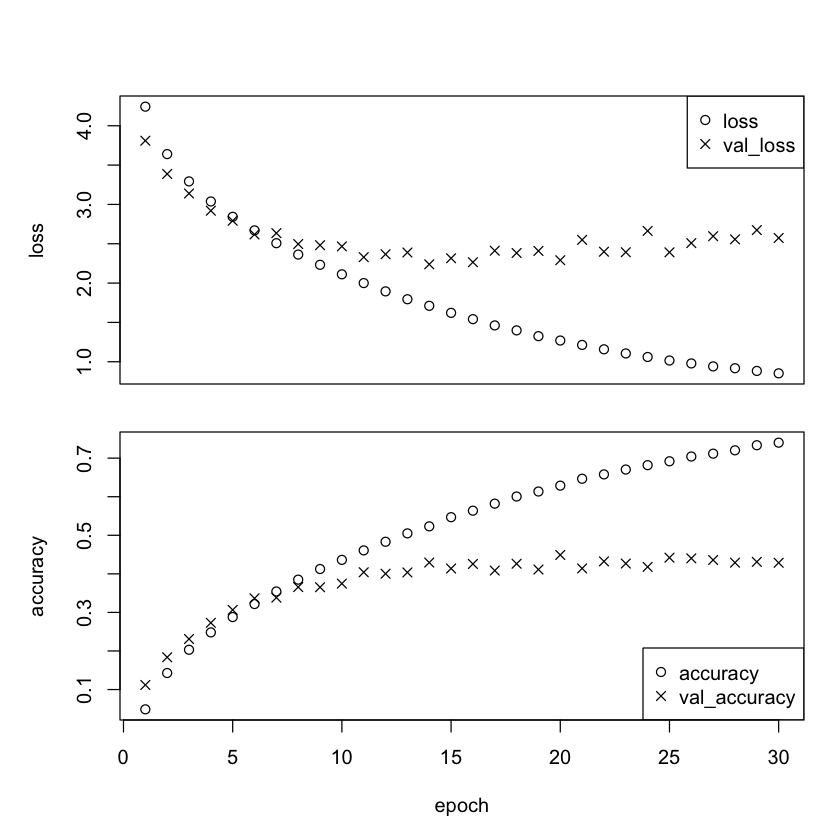

In [17]:
plot(history)

# References

Chapter 10, **An Introduction to Statistical Learning with Applications in R**, Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani